In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-75.64731479403305 46.96419729722518
-9.846570764360123 -62.51207403568148
64.36169617929232 -170.58708045861604
-73.11898537726242 -62.423962864054715
69.94213081110351 137.8354626967684
24.237251043799816 125.71061631154896
45.4612410548352 -88.09430606664377
-26.873147984330444 -99.07605960833702
68.82578719610765 71.86236094873189
60.46566627881185 151.3612662651733
-74.02784626504058 -138.8540901216391
-21.22146732623962 -171.9246465412336
16.250366045131784 77.60340451244679
-82.81817027204563 -17.35033555978802
-56.44007794347446 125.87107269174305
-67.90340021112762 -46.32246925120427
7.8849138947788475 75.25914978515863
81.95767703598653 37.86201140054803
62.412468816322416 -64.42964811898179
-75.2003252986549 -17.407977977963867
-37.93577730581665 -165.04530330000114
23.225424931146478 -111.77449423152194
-32.3831208210028 -42.4048554238409
17.167416824927415 -35.58038323663007
-85.7293491543654 -0.36567689128693814
81.44047462300594 61.377088412890174
42.21982874311885 126.5

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b5b0e3f3e1d6eb9b1041152ec4590cc1


In [11]:
# List of city data
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the City information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | ariquemes
Processing Record 3 of Set 1 | lavrentiya
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | deputatskiy
Processing Record 6 of Set 1 | hirara
Processing Record 7 of Set 1 | marinette
Processing Record 8 of Set 1 | pisco
Processing Record 9 of Set 1 | yar-sale
Processing Record 10 of Set 1 | karamken
City not found. Skipping...
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | pangai
Processing Record 13 of Set 1 | gadwal
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | kollam
Processing Record 16 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 17 of Set 1 | pangnirtung
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | todos santos
Processing Record 21 of Set 1 | laguna
Processing Record 22 of Set 1 | p

Processing Record 36 of Set 4 | port elizabeth
Processing Record 37 of Set 4 | peniche
Processing Record 38 of Set 4 | clyde river
Processing Record 39 of Set 4 | yellowknife
Processing Record 40 of Set 4 | inirida
Processing Record 41 of Set 4 | necochea
Processing Record 42 of Set 4 | richards bay
Processing Record 43 of Set 4 | isparta
Processing Record 44 of Set 4 | penzance
Processing Record 45 of Set 4 | owensboro
Processing Record 46 of Set 4 | diamantino
Processing Record 47 of Set 4 | singaparna
Processing Record 48 of Set 4 | falun
Processing Record 49 of Set 4 | port lincoln
Processing Record 50 of Set 4 | manavalakurichi
Processing Record 1 of Set 5 | wajid
Processing Record 2 of Set 5 | klaksvik
Processing Record 3 of Set 5 | pingliang
Processing Record 4 of Set 5 | mazamet
Processing Record 5 of Set 5 | severo-yeniseyskiy
Processing Record 6 of Set 5 | ahuimanu
Processing Record 7 of Set 5 | bereda
Processing Record 8 of Set 5 | ulladulla
Processing Record 9 of Set 5 | il

Processing Record 27 of Set 8 | camacha
Processing Record 28 of Set 8 | jojoima
Processing Record 29 of Set 8 | pringsewu
Processing Record 30 of Set 8 | petropavlovka
Processing Record 31 of Set 8 | sao domingos do maranhao
Processing Record 32 of Set 8 | birao
Processing Record 33 of Set 8 | sinnamary
Processing Record 34 of Set 8 | chase
Processing Record 35 of Set 8 | borskoye
Processing Record 36 of Set 8 | livingston
Processing Record 37 of Set 8 | beipiao
Processing Record 38 of Set 8 | margate
Processing Record 39 of Set 8 | mogadishu
Processing Record 40 of Set 8 | saint-augustin
Processing Record 41 of Set 8 | vilyuysk
Processing Record 42 of Set 8 | jimo
Processing Record 43 of Set 8 | guerrero negro
Processing Record 44 of Set 8 | kashiwazaki
Processing Record 45 of Set 8 | katangli
Processing Record 46 of Set 8 | zhetybay
City not found. Skipping...
Processing Record 47 of Set 8 | yanan
City not found. Skipping...
Processing Record 48 of Set 8 | maniitsoq
Processing Record

Processing Record 13 of Set 12 | mitsamiouli
Processing Record 14 of Set 12 | kashan
Processing Record 15 of Set 12 | dera ghazi khan
Processing Record 16 of Set 12 | anadyr
Processing Record 17 of Set 12 | shemordan
Processing Record 18 of Set 12 | slavyanka
Processing Record 19 of Set 12 | grindavik
Processing Record 20 of Set 12 | krasnoselkup
Processing Record 21 of Set 12 | gigmoto
Processing Record 22 of Set 12 | dodge city
Processing Record 23 of Set 12 | george town
Processing Record 24 of Set 12 | fort nelson
Processing Record 25 of Set 12 | isiro
Processing Record 26 of Set 12 | nigran
Processing Record 27 of Set 12 | hit
Processing Record 28 of Set 12 | uyuni
Processing Record 29 of Set 12 | carutapera
Processing Record 30 of Set 12 | odienne
Processing Record 31 of Set 12 | maturin
Processing Record 32 of Set 12 | santa cruz
Processing Record 33 of Set 12 | kantang
Processing Record 34 of Set 12 | sheltozero
Processing Record 35 of Set 12 | polovinnoye
Processing Record 36 

In [27]:
len(city_data)


564

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,63.18,95,100,3.00,ZA,2022-10-16 00:25:01
1,Ariquemes,-9.9133,-63.0408,77.11,74,97,3.15,BR,2022-10-16 00:25:01
2,Lavrentiya,65.5833,-171.0000,31.73,74,100,23.51,RU,2022-10-16 00:22:50
3,Ushuaia,-54.8000,-68.3000,44.26,49,0,12.66,AR,2022-10-16 00:21:45
4,Deputatskiy,69.3000,139.9000,11.84,92,100,4.12,RU,2022-10-16 00:25:02
5,Hirara,24.8000,125.2833,82.67,89,75,18.41,JP,2022-10-16 00:25:02
6,Marinette,45.1000,-87.6307,43.25,93,100,5.75,US,2022-10-16 00:25:03
7,Pisco,-13.7000,-76.2167,60.85,82,0,14.97,PE,2022-10-16 00:25:03
8,Yar-Sale,66.8333,70.8333,38.16,88,100,4.14,RU,2022-10-16 00:25:04
9,Rikitea,-23.1203,-134.9692,73.83,83,27,18.95,PF,2022-10-16 00:25:04


In [30]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2022-10-16 00:25:01,-33.5906,26.8910,63.18,95,100,3.00
1,Ariquemes,BR,2022-10-16 00:25:01,-9.9133,-63.0408,77.11,74,97,3.15
2,Lavrentiya,RU,2022-10-16 00:22:50,65.5833,-171.0000,31.73,74,100,23.51
3,Ushuaia,AR,2022-10-16 00:21:45,-54.8000,-68.3000,44.26,49,0,12.66
4,Deputatskiy,RU,2022-10-16 00:25:02,69.3000,139.9000,11.84,92,100,4.12
5,Hirara,JP,2022-10-16 00:25:02,24.8000,125.2833,82.67,89,75,18.41
6,Marinette,US,2022-10-16 00:25:03,45.1000,-87.6307,43.25,93,100,5.75
7,Pisco,PE,2022-10-16 00:25:03,-13.7000,-76.2167,60.85,82,0,14.97
8,Yar-Sale,RU,2022-10-16 00:25:04,66.8333,70.8333,38.16,88,100,4.14
9,Rikitea,PF,2022-10-16 00:25:04,-23.1203,-134.9692,73.83,83,27,18.95


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [34]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1665888325.0950077

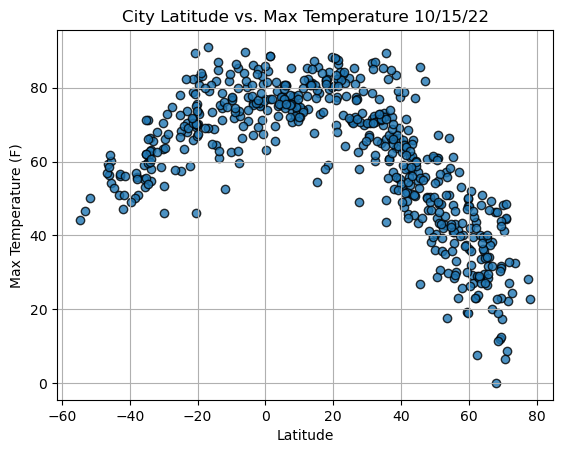

In [36]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


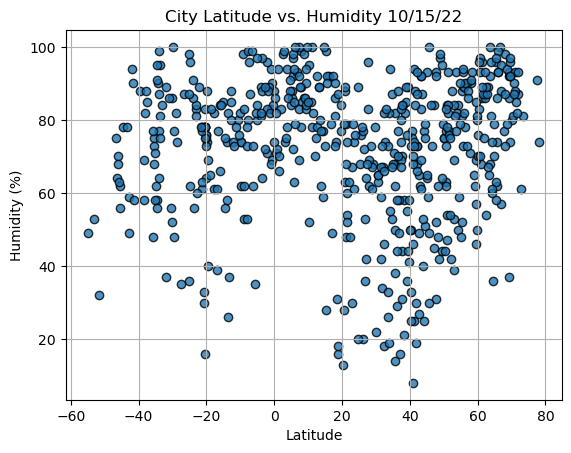

In [37]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

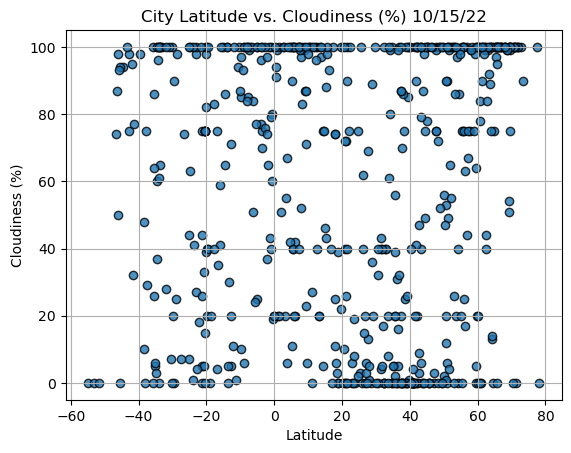

In [38]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

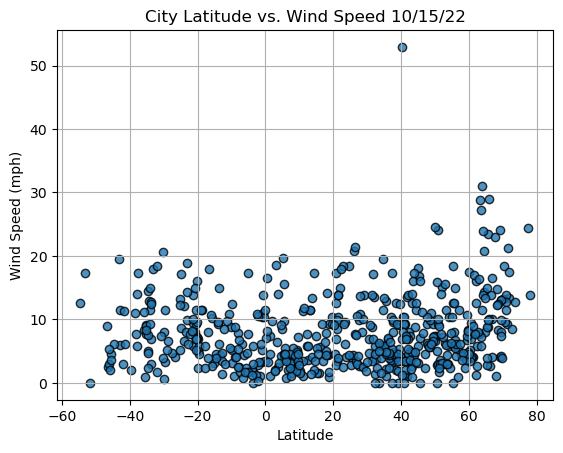

In [39]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [41]:
index13 = city_data_df.loc[13]
index13

City                       Kollam
Country                        IN
Date          2022-10-16 00:23:06
Lat                        8.8833
Lng                          76.6
Max Temp                     77.5
Humidity                       86
Cloudiness                     99
Wind Speed                    3.2
Name: 13, dtype: object

In [43]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Lavrentiya,RU,2022-10-16 00:22:50,65.5833,-171.0000,31.73,74,100,23.51
4,Deputatskiy,RU,2022-10-16 00:25:02,69.3000,139.9000,11.84,92,100,4.12
5,Hirara,JP,2022-10-16 00:25:02,24.8000,125.2833,82.67,89,75,18.41
6,Marinette,US,2022-10-16 00:25:03,45.1000,-87.6307,43.25,93,100,5.75
8,Yar-Sale,RU,2022-10-16 00:25:04,66.8333,70.8333,38.16,88,100,4.14
...,...,...,...,...,...,...,...,...,...
559,Osa,RU,2022-10-16 00:40:00,57.2829,55.4567,39.70,86,67,6.17
560,Pedernales,DO,2022-10-16 00:40:00,18.0384,-71.7440,81.00,73,11,4.41
561,Jian,CN,2022-10-16 00:40:00,27.1172,114.9793,71.53,42,3,10.54
562,Muisne,EC,2022-10-16 00:40:01,0.6000,-80.0333,73.94,82,94,8.23


In [44]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Lavrentiya,RU,2022-10-16 00:22:50,65.5833,-171.0000,31.73,74,100,23.51
4,Deputatskiy,RU,2022-10-16 00:25:02,69.3000,139.9000,11.84,92,100,4.12
5,Hirara,JP,2022-10-16 00:25:02,24.8000,125.2833,82.67,89,75,18.41
6,Marinette,US,2022-10-16 00:25:03,45.1000,-87.6307,43.25,93,100,5.75
8,Yar-Sale,RU,2022-10-16 00:25:04,66.8333,70.8333,38.16,88,100,4.14


In [42]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4       True
       ...  
559     True
560     True
561     True
562     True
563     True
Name: Lat, Length: 564, dtype: bool

In [45]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [46]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

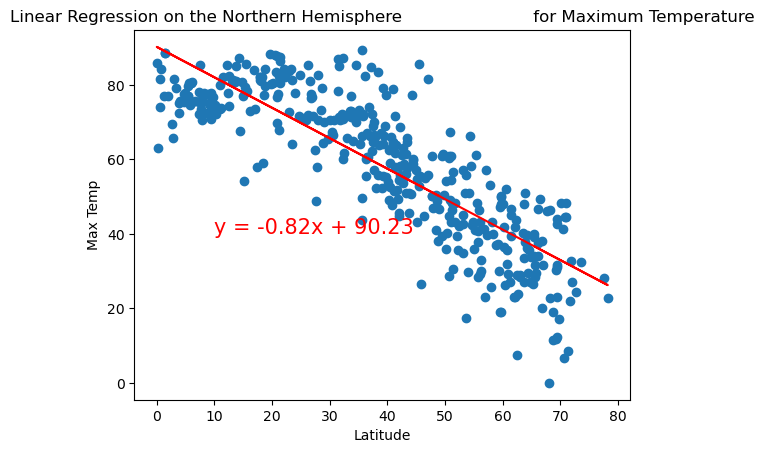

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

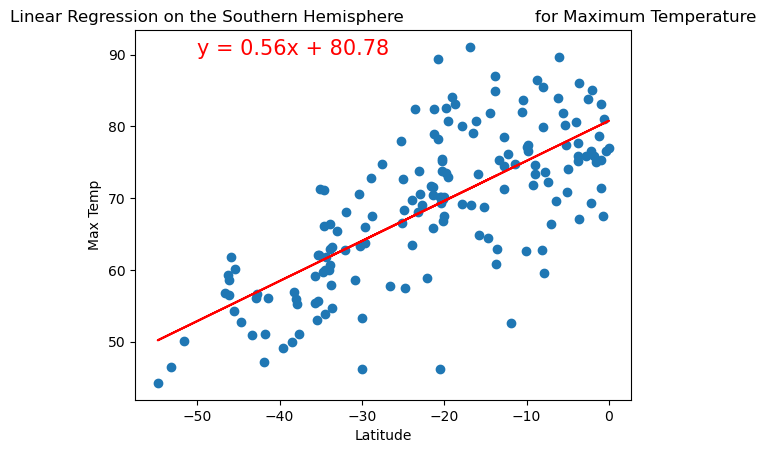

In [49]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))